In [44]:
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

cwd = os.getcwd()
sys.path.append(cwd+"/../handy_functions")

from concat_pickles import get_outputs,print_df
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator

In [45]:
data_folder = '/Users/kendranoneman/Projects/mayo/NeuralDecoding/runs/all_decoders'
df = get_outputs(data_folder,0)
df.head(1)

,sess,repeat,outer_fold,nMT,nFEF,model,mean_R2,mean_rho,mean_R2_null,mean_rho_null
0,16,0,0,24,24,0,-0.011687,-0.025916,-0.010374,-0.011118


In [46]:
test_sess = df.loc[df['sess']==29]
test_melt = test_sess.melt(id_vars=['model','outer_fold'], value_vars=['mean_R2','mean_R2_null'],
                           var_name='true_null', value_name='R2')
test_melt.head(5)

,model,outer_fold,true_null,R2
0,0,0,mean_R2,0.654930
1,1,0,mean_R2,0.658820
2,2,0,mean_R2,0.668274
3,3,0,mean_R2,0.771604
4,4,0,mean_R2,0.890396


ValueError: Missing group value `0` in model (specified in `pairs`)

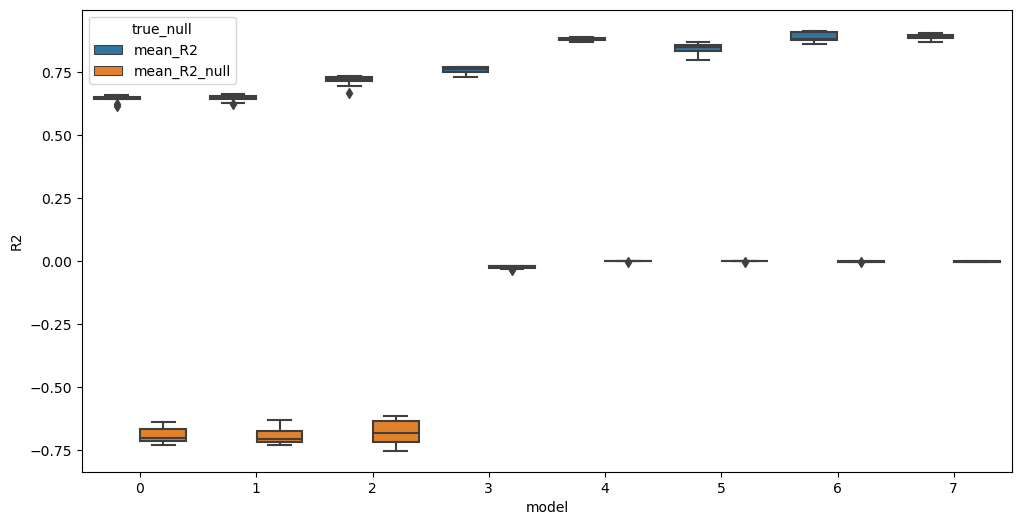

In [52]:
pairs = [
    [('0','mean_R2'), ('0','mean_R2_null')],
    [('1','mean_R2'), ('1','mean_R2_null')]
]

fig, ax = plt.subplots(1,1, figsize=(12,6))
#ax.set_yscale('log')

hue_plot_params = {'data':test_melt, 'x':'model', 'y':'R2', 'hue': 'true_null'}
a = sns.boxplot(ax=ax, **hue_plot_params)
annotator = Annotator(ax=ax, pairs=pairs, **hue_plot_params)
annotator.configure(test="Mann-Whitney").apply_and_annotate()
#a.set_xticklabels(['wf (n = {})'.format(wf_size),'wc (n = {})'.format(wc_size),'dnn (n = {})'.format(dnn_size)], rotation=0)



In [ ]:

hue_plot_params = [[],[],[]]
hue_plot_params[0] = {'data': df.loc[df['sess'] == sessions[s]],'x': 'model','y': 'r2',"hue": "Brain Area","palette": colors}
hue_plot_params[1] = {'data': df.loc[df['sess'] == sessions[s]],'x': 'model','y': 'rho',"hue": "Brain Area","palette": colors}
hue_plot_params[2] = {'data': df.loc[df['sess'] == sessions[s]],'x': 'model','y': 'time',"hue": "Brain Area","palette": colors}

wf_size = int((df[(df['sess']==sessions[s]) & (df['model']=='wf')].shape[0])/4)
wc_size = int((df[(df['sess']==sessions[s]) & (df['model']=='wc')].shape[0])/4)
dnn_size = int((df[(df['sess']==sessions[s]) & (df['model']=='dnn')].shape[0])/4)
print(wf_size)
print(wc_size)

a1 = sns.boxplot(ax=axes[s], **hue_plot_params[0])
annotator = Annotator(axes[s], pairs, **hue_plot_params[0])
annotator.configure(test="Mann-Whitney").apply_and_annotate()
axes[s].set_xticklabels(['wf (n = {})'.format(wf_size),'wc (n = {})'.format(wc_size),'dnn (n = {})'.format(dnn_size)], rotation=0)
a1.set(xlabel=None)
        a1.set(title='pa' + str(sessions[s])+' ({} MT, {} FEF)'.format(mt_perSess[s],fef_perSess[s]))
        
        if s==0:
            a1.set_ylabel('Prediction Accuracy ($R^2$)', fontsize = 16)
        else:
            a1.set(ylabel=None)
        
        if s!=len(sessions)-1:
            a1.get_legend().remove()
        else:    
            sns.move_legend(a1, "center left", bbox_to_anchor=(1, 0.65))  
            
fig.text(0.5, 0.01, 'model type', ha='center', fontsize=16)
fig.savefig(fig_folder+'ffmodels_r2_3sess.png', dpi=300, bbox_inches='tight')        